In [1]:
import pandas as pd
import numpy as np
from snguess.data import data_cuts, merge_test_features_labels, get_testing_input, get_training_input, plot_roc_curve
from sklearn.linear_model import LogisticRegression

In [2]:
# Load training data
training_data = pd.read_csv('snguess_features_class.csv')

In [3]:
# Perform cuts to training data
training_data = data_cuts(training_data, nbr_det=100)
training_data

,cut_pp,jd_det,jd_last,ndet,mag_det,mag_last,t_lc,rb_med,drb_med,distnr_med,...,slope_fall_r,rcf_class,rcf_sn,rcf_agn,rcf_cv,targeted_by_bts,subclass,snclass,rcf_gone,class
348,0,2.458635e+06,2.458638e+06,2,19.719999,19.601646,2.928553,0.882857,NaN,0.122762,...,NaN,NaN,False,False,False,False,NaN,NaN,False,0
1444,0,2.458635e+06,2.458638e+06,2,19.881809,19.568172,2.931736,0.907857,NaN,0.581964,...,NaN,NaN,False,False,False,False,NaN,NaN,False,0
1531,0,2.458472e+06,2.458472e+06,2,18.473101,16.791924,0.065359,0.506667,NaN,0.872350,...,NaN,NaN,False,False,False,False,NaN,NaN,True,1
1538,0,2.458473e+06,2.458473e+06,2,16.943300,17.168713,0.067998,0.715000,NaN,4.650034,...,NaN,NaN,False,False,False,False,NaN,NaN,True,1
1596,0,2.458440e+06,2.458442e+06,2,20.164499,20.094238,2.039861,0.253334,NaN,5.100083,...,NaN,NaN,False,False,False,False,NaN,NaN,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250129,0,2.458436e+06,2.458436e+06,2,16.717199,16.552896,0.000463,0.483333,NaN,0.750600,...,NaN,NaN,False,False,False,False,NaN,NaN,True,1
250130,0,2.458381e+06,2.458384e+06,2,20.803699,20.618706,2.984861,0.526667,NaN,0.257240,...,NaN,NaN,False,False,False,False,NaN,NaN,True,1
250266,0,2.458667e+06,2.458670e+06,2,17.142900,17.494493,2.981528,0.937143,1.000000,0.140464,...,NaN,NaN,False,False,False,True,NaN,NaN,False,0
250274,0,2.458667e+06,2.458670e+06,2,20.681200,18.855352,2.981528,0.744286,1.000000,4.394447,...,NaN,NaN,False,False,False,True,NaN,NaN,True,1


In [4]:
# Load test data features
test_data_features = pd.read_csv('snguess_hu_tns_msip_ztfname.csv')

In [5]:
# Load test data labels
bts_transients = pd.read_csv('bts_transients.csv', index_col='ZTFID')

In [6]:
# Merge test data features and labels
test_data = merge_test_features_labels(test_data_features, bts_transients)
test_data

,stockid,cut_pp,jd_det,jd_last,ndet,mag_det,mag_last,t_lc,rb_med,drb_med,...,col_peak,success,SNGuess,SNGuessBool,slope_fall_g,slope_fall_r,ztfname,targeted_by_bts,type,SNGuessProb
0,870833,0,2.459308e+06,2.459308e+06,1,19.805759,19.805759,0.000000,0.925714,1.000000,...,NaN,False,0.000000,NaN,NaN,NaN,ZTF18aaadcnj,False,NaN,0.500000
1,870833,0,2.459308e+06,2.459308e+06,1,20.053623,20.053623,0.000000,0.888571,1.000000,...,NaN,False,0.000000,NaN,NaN,NaN,ZTF18aaadcnj,False,NaN,0.500000
2,870833,0,2.459308e+06,2.459308e+06,2,19.805759,20.053623,0.046343,0.907143,1.000000,...,NaN,False,0.000000,NaN,NaN,NaN,ZTF18aaadcnj,False,NaN,0.500000
3,870833,0,2.459308e+06,2.459308e+06,2,19.805759,20.053623,0.046343,0.907143,1.000000,...,NaN,True,-3.241392,0.0,NaN,NaN,ZTF18aaadcnj,False,NaN,0.037637
4,877905,0,2.459320e+06,2.459320e+06,2,18.895201,19.179316,0.039549,0.856429,0.996535,...,NaN,False,0.000000,NaN,NaN,NaN,ZTF18aaaddej,False,NaN,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173397,628849937,0,2.459326e+06,2.459326e+06,1,16.497551,16.497551,0.000000,0.861429,0.999992,...,NaN,False,0.000000,NaN,NaN,NaN,ZTF18adiaesn,False,NaN,0.500000
173398,628849937,0,2.459324e+06,2.459326e+06,2,16.225618,16.497551,1.970058,0.872857,0.999989,...,NaN,False,0.000000,NaN,NaN,NaN,ZTF18adiaesn,False,NaN,0.500000
173399,628849937,0,2.459324e+06,2.459326e+06,3,16.225618,16.545849,2.010463,0.884286,0.999992,...,NaN,False,0.000000,NaN,NaN,NaN,ZTF18adiaesn,False,NaN,0.500000
173400,628849937,0,2.459326e+06,2.459332e+06,3,16.497551,18.155434,6.040359,0.861429,0.999992,...,-0.048298,False,0.000000,NaN,0.274468,NaN,ZTF18adiaesn,False,NaN,0.500000


In [7]:
test_data.columns

Index(['stockid', 'cut_pp', 'jd_det', 'jd_last', 'ndet', 'mag_det', 'mag_last',
       't_lc', 'rb_med', 'drb_med', 'distnr_med', 'magnr_med', 'classtar_med',
       'sgscore1_med', 'distpsnr1_med', 'sgscore2_med', 'distpsnr2_med',
       'neargaia_med', 'maggaia_med', 'bool_pure', 't_predetect',
       'bool_peaked', 'jd_max', 'mag_peak', 'bool_norise', 'bool_rising',
       'bool_hasgaps', 'slope_rise_g', 'slope_rise_r', 'col_det', 'col_last',
       'col_peak', 'success', 'SNGuess', 'SNGuessBool', 'slope_fall_g',
       'slope_fall_r', 'ztfname', 'targeted_by_bts', 'type', 'SNGuessProb'],
      dtype='object')

In [8]:
# Extract
X_train, y_train = get_training_input(training_data)
X_test, y_test =  get_testing_input(test_data)

In [9]:
X_train.shape

(3498, 1)

In [10]:
# Fit LogReg model to training data set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [11]:
# Predict over test data set
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.48


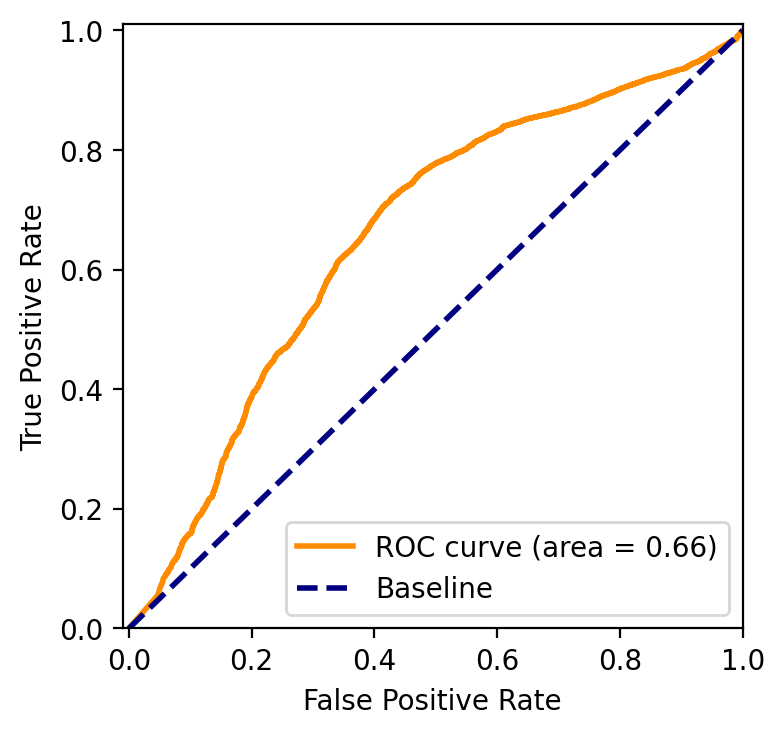

In [12]:
# Plot ROC curve
fpr, tpr, auc = plot_roc_curve(logreg, X_test, y_test)

In [13]:
np.savez('data/logreg_distnr_fpr_tpr_auc.npz', fpr=fpr, tpr=tpr, auc=auc)